# Challenge 1 – Risk and Reward Analysis

This notebook explores risk-adjusted returns and diversification in a basket of 20 popular stocks.

 ## Objectives
1. Download and visualize historical price data
2. Calculate risk/reward metrics (return, volatility, Sharpe ratio)
3. Analyze covariance and correlation
4. Select 5 best long-term investments using diversification logic



## Import Libraries and Data

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [59]:
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'JNJ', 'PFE', 'HD', 'NKE', 
           'KO', 'PG', 'XOM', 'CVX', 'CAT', 'LMT', 'NEE', 'DUK', 
           'DIS', 'CSCO', 'PLD', 'LIN']

stocks = yf.download(tickers, start = '2010-01-01', end = '2025-01-01')

C:\Users\alexm\AppData\Local\Temp\ipykernel_30496\1467066715.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(tickers, start = '2010-01-01', end = '2025-01-01')
[*********************100%***********************]  20 of 20 completed


In [60]:
stocks

Price            Close                                                 \
Ticker            AAPL         CAT       CSCO         CVX         DIS   
Date                                                                    
2010-01-04    6.431897   39.547813  16.255335   42.603550   27.475878   
2010-01-05    6.443017   40.020626  16.182919   42.905315   27.407339   
2010-01-06    6.340532   40.142204  16.077574   42.910713   27.261692   
2010-01-07    6.328811   40.304314  16.149992   42.749035   27.270260   
2010-01-08    6.370886   40.756874  16.235580   42.824497   27.313093   
...                ...         ...        ...         ...         ...   
2024-12-24  257.578674  364.472504  59.050674  140.550125  112.082031   
2024-12-26  258.396667  364.026276  59.178940  140.686935  112.072083   
2024-12-27  254.974930  361.785309  58.813881  140.706467  111.076332   
2024-12-30  251.593094  359.950928  58.399494  139.797745  110.329514   
2024-12-31  249.817383  359.703064  58.409359  141.527252  110.877174   

Price                                                                  ...  \
Ticker             DUK          HD         JNJ         JPM         KO  ...   
Date                                                                   ...   
2010-01-04   25.810032   19.810139   40.973625   28.829174  17.692514  ...   
2010-01-05   25.384171   19.955242   40.498520   29.387602  17.478497  ...   
2010-01-06   25.475430   19.886139   40.827923   29.549053  17.472294  ...   
2010-01-07   25.597105   20.121071   40.536522   30.134388  17.428873  ...   
2010-01-08   25.612316   20.024340   40.675884   30.060385  17.106281  ...   
...                ...         ...         ...         ...        ...  ...   
2024-12-24  106.997498  391.210724  143.461914  239.589218  61.939281  ...   
2024-12-26  106.349442  390.223175  143.196320  240.409912  61.673145  ...   
2024-12-27  106.378899  387.971527  142.675003  238.462036  61.554871  ...   
2024-12-30  105.760300  384.584198  140.992996  236.632812  61.140888  ...   
2024-12-31  105.789757  384.149689  142.252045  237.018433  61.367588  ...   

Price        Volume                                                            \
Ticker          LIN      LMT      MSFT       NEE       NKE       PFE       PG   
Date                                                                            
2010-01-04  1233000  2408300  38409100  10408800  11972400  54898644  9190800   
2010-01-05  2170900  2356500  49749600  11186400   6275200  45714931  8649400   
2010-01-06  2359700  5208100  58182400  13493200  13399200  43640975  9908400   
2010-01-07  2105100  7038300  50559700   9768800   7187600  41557112  8972800   
2010-01-08  1424900  3629400  51197400   9074400   7249600  32049716  8464600   
...             ...      ...       ...       ...       ...       ...      ...   
2024-12-24   824200   375900   7164500   3001800   4919100  19716400  2460800   
2024-12-26   991500   662100   8194200   4503800   6363500  31406000  3629400   
2024-12-27  1444900   820600  18117700   5458100   6334400  35218300  4367900   
2024-12-30  1608000   887600  13158700   8399000   9042900  32859100  4354500   
2024-12-31  1386700   731900  13246500   6216500   9425600  27085500  3957600   

Price                                    
Ticker          PLD         V       XOM  
Date                                     
2010-01-04  1169700  20180000  27809100  
2010-01-05  1048200  25833600  30174700  
2010-01-06  1163400  16254000  35044700  
2010-01-07   950500  27841200  27192100  
2010-01-08  1072700  11907200  24891800  
...             ...       ...       ...  
2024-12-24  1883700   2684100   7807000  
2024-12-26  4799000   2856000   9652400  
2024-12-27  3655100   3489200  11943900  
2024-12-30  4038500   3478500  11080800  
2024-12-31  4602700   3963800  12387800  

[3774 rows x 100 columns]

## Normalize Prices

This allows us to compare stock performances on the same scale.

In [61]:
# Normally on trading strategies we use the Close Price for analysis
close = stocks.loc[:,'Close'].copy()

In [62]:
# Here we normalize all the different stocks to figure out how they perfomed against eachother
norm_close = close.div(close.iloc[0]).mul(100)

# Plot Top 5 Performers

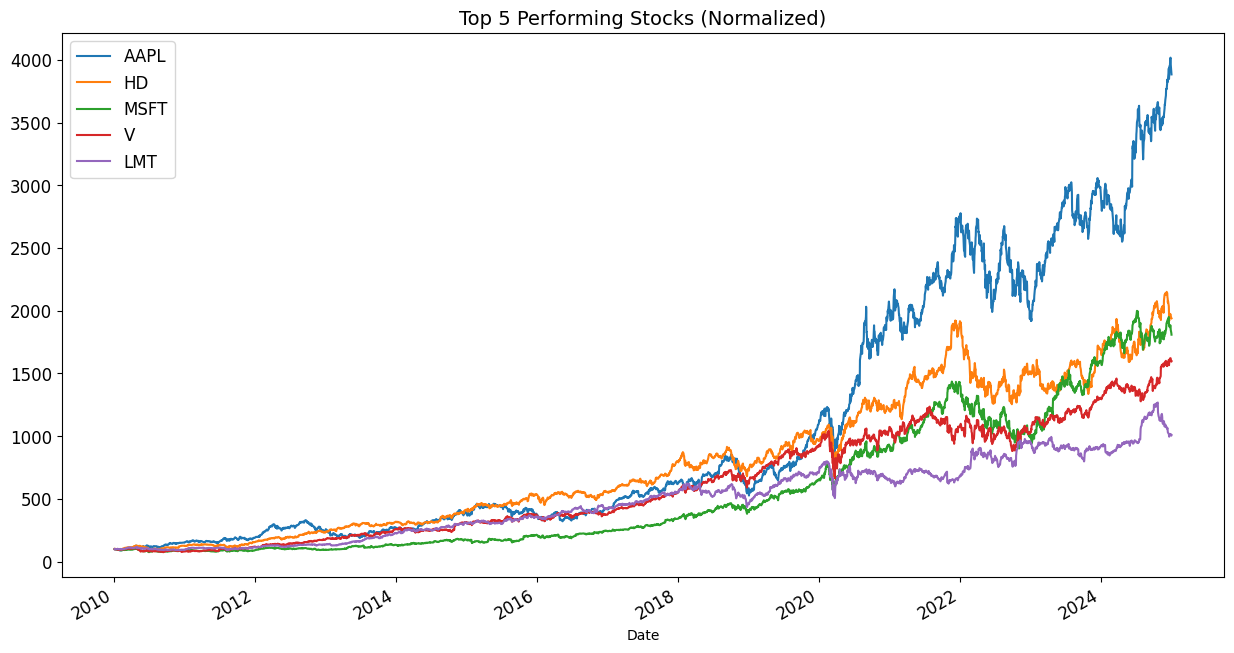

In [63]:
# Step 1: Calculate performance (final value - initial value)
performance = norm_close.iloc[-1]  # last row has final normalized value

# Step 2: Sort descending and get top 5 tickers
top5 = performance.sort_values(ascending=False).head(5).index

# Step 3: Plot only those 5
norm_close[top5].plot(figsize=(15,8), fontsize=12)
plt.title("Top 5 Performing Stocks (Normalized)", fontsize=14)
plt.legend(fontsize=12)
plt.show()


## Calculate Risk and Reward (Annualized)


In [64]:
ret=close.pct_change().dropna()
ret.head()

Ticker,AAPL,CAT,CSCO,CVX,DIS,DUK,HD,JNJ,JPM,KO,LIN,LMT,MSFT,NEE,NKE,PFE,PG,PLD,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.001729,0.011955,-0.004455,0.007083,-0.002495,-0.016500,0.007325,-0.011595,0.019370,-0.012097,-0.018637,0.010409,0.000323,-0.009765,0.003979,-0.014263,0.000327,0.014585,-0.011459,0.003905
2010-01-06,-0.015906,0.003038,-0.006510,0.000126,-0.005314,0.003595,-0.003463,0.008134,0.005494,-0.000355,0.008871,-0.014681,-0.006137,0.009862,-0.006097,-0.003215,-0.004743,-0.008935,-0.013428,0.008643
2010-01-07,-0.001849,0.004038,0.004504,-0.003768,0.000314,0.004776,0.011814,-0.007137,0.019809,-0.002485,0.002600,-0.027447,-0.010400,-0.002817,0.009814,-0.003763,-0.005423,0.008233,0.009306,-0.003142
2010-01-08,0.006648,0.011229,0.005300,0.001765,0.001571,0.000594,-0.004807,0.003438,-0.002456,-0.018509,0.006547,0.016127,0.006897,-0.008663,-0.001974,0.008095,-0.001322,-0.002722,0.002766,-0.004012
2010-01-11,-0.008821,0.062811,-0.002838,0.017742,-0.016311,0.010095,-0.028295,0.000156,-0.003357,0.020308,0.009449,0.004761,-0.012720,-0.000760,-0.012325,0.008030,-0.003971,0.001170,-0.002874,0.011219


In [65]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,3773.0,0.001124,0.017552,-0.128647,-0.007399,0.001001,0.010355,0.119808
CAT,3773.0,0.000753,0.018295,-0.142822,-0.008498,0.000585,0.010267,0.103321
CSCO,3773.0,0.000473,0.016289,-0.162107,-0.006519,0.000485,0.007961,0.159504
CVX,3773.0,0.000461,0.016868,-0.221248,-0.007320,0.000700,0.008257,0.227407
DIS,3773.0,0.000505,0.016427,-0.131632,-0.006790,0.000442,0.008234,0.144123
DUK,3773.0,0.000443,0.011739,-0.115021,-0.005264,0.000618,0.006595,0.123009
HD,3773.0,0.000894,0.014624,-0.197939,-0.005896,0.000940,0.008302,0.137508
JNJ,3773.0,0.000385,0.010523,-0.100379,-0.004472,0.000311,0.005695,0.079977
JPM,3773.0,0.000711,0.017492,-0.149649,-0.007625,0.000584,0.009073,0.180125


In [66]:
# Get only mean and std
summary = ret.describe().T.loc[:,['mean','std']]
summary

,mean,std
Ticker,,
AAPL,0.001124,0.017552
CAT,0.000753,0.018295
CSCO,0.000473,0.016289
CVX,0.000461,0.016868
DIS,0.000505,0.016427
DUK,0.000443,0.011739
HD,0.000894,0.014624
JNJ,0.000385,0.010523
JPM,0.000711,0.017492


In [67]:
#Transform to annual values
summary['mean']=summary['mean']*252
summary['std']=summary['std']*np.sqrt(252)
summary

,mean,std
Ticker,,
AAPL,0.283364,0.278630
CAT,0.189746,0.290429
CSCO,0.119097,0.258587
CVX,0.116252,0.267773
DIS,0.127154,0.260766
DUK,0.111608,0.186352
HD,0.225243,0.232153
JNJ,0.097110,0.167050
JPM,0.179232,0.277672


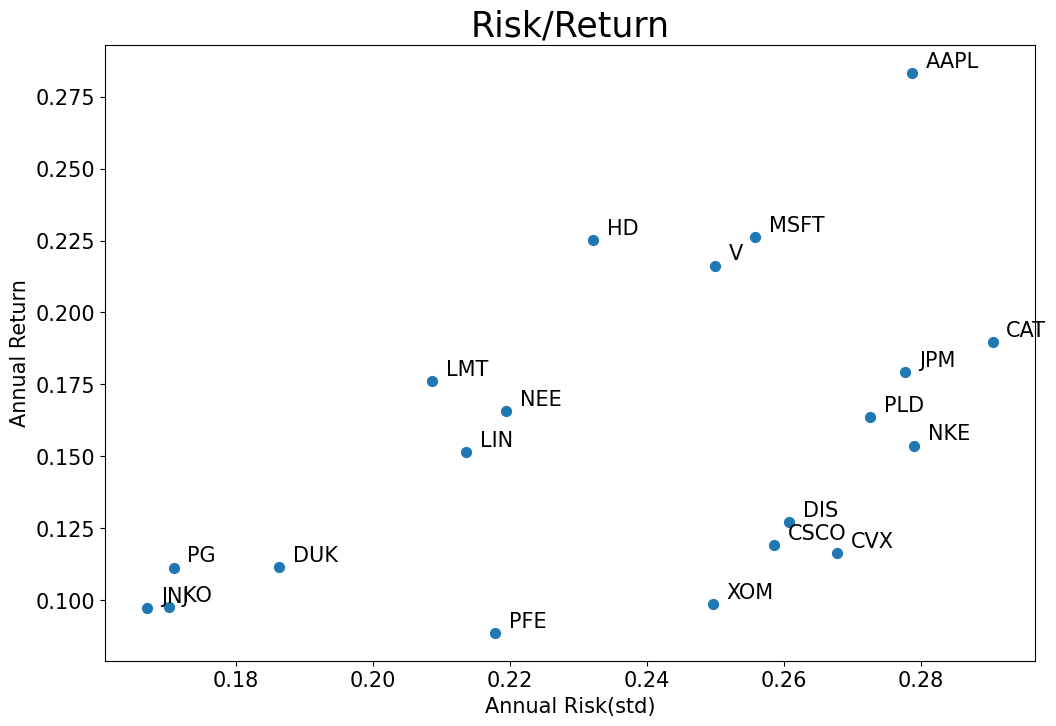

In [68]:
summary.plot.scatter(x='std', y='mean',figsize=(12,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,'std']+0.002,summary.loc[i,'mean']+0.002),size=15)
plt.xlabel('Annual Risk(std)',fontsize=15)
plt.ylabel('Annual Return',fontsize=15)
plt.title('Risk/Return',fontsize=25)
plt.show()

## Calculate Sharpe Ratio

In [69]:
daily_returns = close.pct_change().dropna()
annual_returns = daily_returns.mean() * 252
annual_std = daily_returns.std() * np.sqrt(252)
risk_free_rate = 0.02  # 2% annualized
sharpe_ratio = (annual_returns - risk_free_rate) / annual_std


In [70]:
# Sorting by Top 10
top10_sharpe = sharpe_ratio.sort_values(ascending=False).head(10).index


In [71]:
#filter data by the top10 with best Sharpe

top_returns = daily_returns[top10_sharpe]
top_close = close[top10_sharpe]
top_norm = top_close.div(top_close.iloc[0]).mul(100)


In [72]:
summary['Sharpe_Ratio'] = (summary['mean'] - risk_free_rate) / summary['std']


## Plot Top 10 Sharpe Ratio Stocks

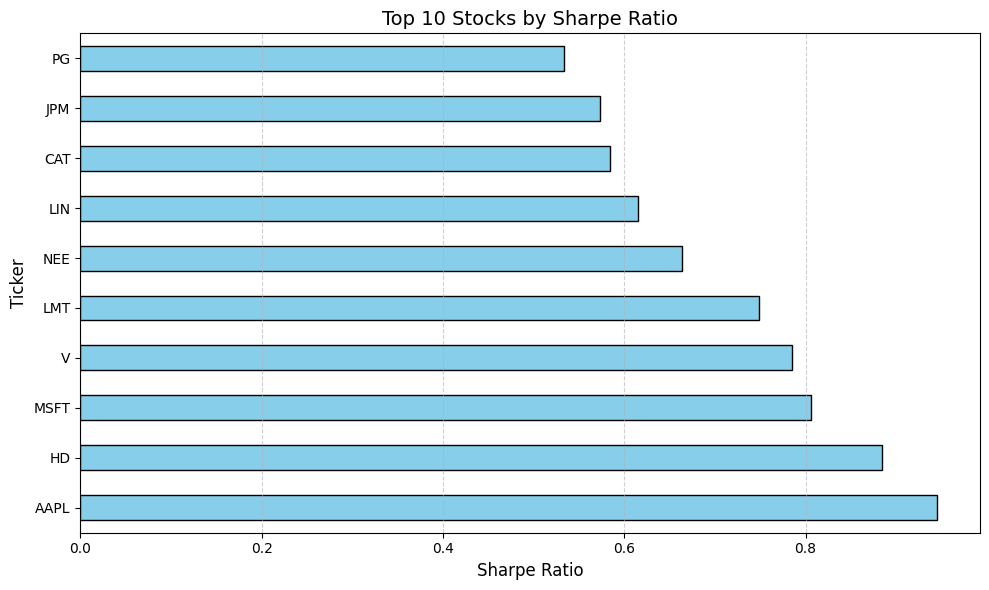

In [81]:
import matplotlib.pyplot as plt

# Sort and get top 10
top10_sharpe = summary.sort_values(by='Sharpe_Ratio', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top10_sharpe['Sharpe_Ratio'].plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Top 10 Stocks by Sharpe Ratio', fontsize=14)
plt.xlabel('Sharpe Ratio', fontsize=12)
plt.ylabel('Ticker', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Covariance & Correlation Analysis


In [74]:
cov_matrix = top_returns.cov()
corr_matrix = top_returns.corr()

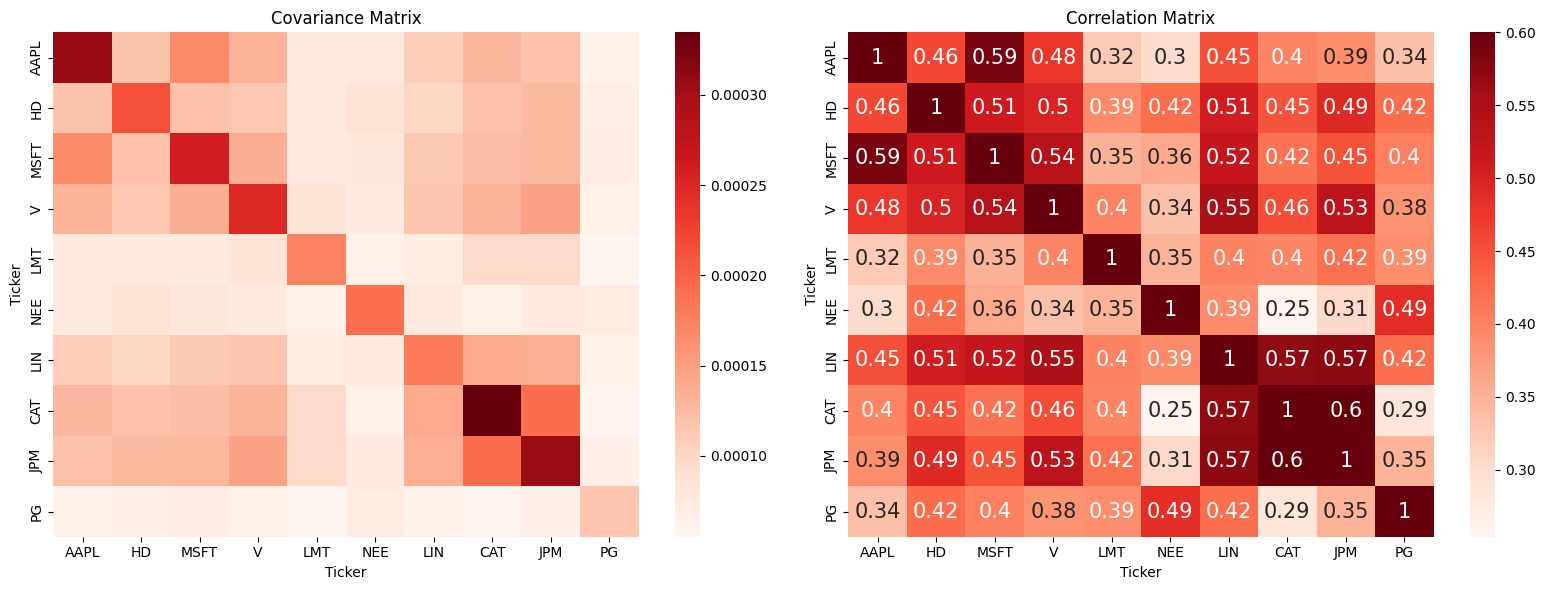

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# --- Covariance Heatmap ---
plt.subplot(1, 2, 1)
sns.heatmap(cov_matrix, cmap='Reds', cbar=True, xticklabels=True, yticklabels=True)
plt.title("Covariance Matrix")

# --- Correlation Heatmap (clean) ---
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, cmap='Reds', annot=True,annot_kws={'size':15},vmax=0.6)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()



## Selecting Final 5 Stocks (Diversified Top Sharpe Ratio Picks)


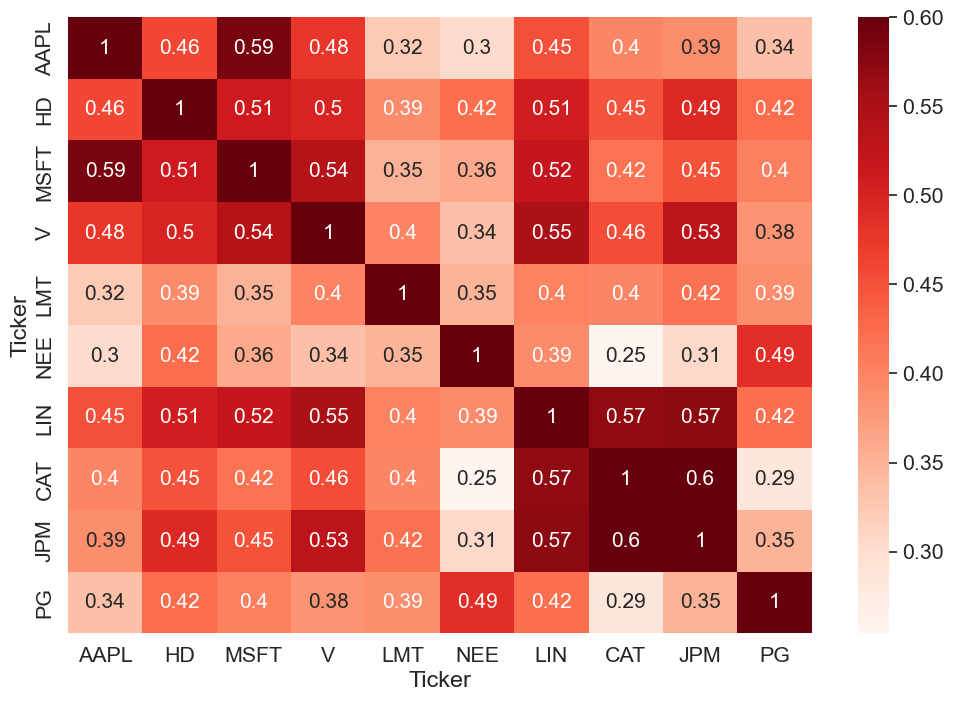

In [85]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix,cmap='Reds',annot=True,annot_kws={'size':15},vmax=0.6)
plt.show()


In [86]:
top10_sharpe

,mean,std,Sharpe_Ratio
Ticker,,,
AAPL,0.283364,0.278630,0.945213
HD,0.225243,0.232153,0.884084
MSFT,0.226149,0.255728,0.806126
V,0.216325,0.249917,0.785561
LMT,0.176262,0.208628,0.748998
NEE,0.165734,0.219385,0.664285
LIN,0.151449,0.213582,0.615449
CAT,0.189746,0.290429,0.584466
JPM,0.179232,0.277672,0.573453


 **Final Portfolio:**
 - AAPL
- HD
 - V
- LMT
- NEE

 These selections balance performance and diversification

